# A brief excursion into xarray
`xarray` is a Python package which uses labels to make handling Numpy multidimensional arrays less of a pain in the butt. These notes are based on [documentation here](http://xarray.pydata.org/en/stable/quick-overview.html)

In [7]:
import numpy as np
import pandas as pd
import xarray as xr

## 1. Create a DataArray

In [13]:
data = xr.DataArray(
    np.random.randn(3, 3, 10), 
    dims=('x', 'y', 't'), 
    coords={'x': [1, 2, 3], 'y':[5, 10, 15], 't': np.linspace(0,1,10, endpoint=False)}
)

In [14]:
data

<xarray.DataArray (x: 3, y: 3, t: 10)>
array([[[-0.02559067,  1.57159342, -0.06860548, -0.67500958,
          0.25065785,  0.18730936,  0.48059469,  1.25409245,
          0.97660735,  0.0793909 ],
        [ 1.09113325, -0.91518388, -0.06275775,  1.29483649,
         -0.04468419,  0.85334306, -1.36487639, -0.12657999,
         -0.3837587 ,  0.13978202],
        [-4.07449006,  0.05996598, -1.35920054, -0.67689187,
          0.4809029 , -1.35448712, -1.31229682, -0.17702386,
          0.02088847,  0.5731095 ]],

       [[-0.35764798,  1.62425363, -0.56583567, -0.12959125,
         -0.50134577, -1.05717825,  0.19600788,  1.82258236,
         -1.91507015,  0.48541738],
        [-3.07865284, -1.97195829, -1.20415447,  0.72018198,
          1.33722756,  0.11896337, -0.16913824,  1.23589731,
          0.3194433 , -1.27049147],
        [ 0.87741829,  1.23206874, -0.4213578 ,  1.41741879,
         -0.90714142, -0.75940514, -0.29287116,  1.36902947,
         -1.04384811, -0.3174537 ]],

       [[-0.33122322, -0.8223462 , -2.12378674,  0.35618605,
          1.84667084,  0.47915425, -1.94307109, -0.44478408,
         -0.34242059, -1.02596207],
        [-0.76499412, -0.93628235, -0.08760794,  1.6028918 ,
         -0.72383782,  0.64855247,  1.14291379,  0.18813083,
          1.48113258,  0.23025316],
        [-0.33333112,  0.31601718,  0.60165656,  0.32272265,
         -0.78970592, -1.77837882,  0.18741257, -0.65600562,
          0.0486723 ,  0.06313569]]])
Coordinates:
  * x        (x) int64 1 2 3
  * t        (t) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
Dimensions without coordinates: y

Key fields: 
* `values` - the array data
* `dims` - the labels of the dimension axes
* `coords` - dictionary of coordinates corresponding to each of the separate dimensions
* `attrs` - dictionary of optional metadata

## 2. Indexing
Four different ways to index data using xarray:

1. (Boring way) Positional by integer numpy index
2. By coordinate location
3. `isel` (integer select) Select axis by integer index
4. `sel` Select axis by coordinate value

In [4]:
# 1. Stupid numpy way
data[0,1,1]

<xarray.DataArray ()>
array(1.38374604)
Coordinates:
    x        int64 1
    y        int64 10
    t        float64 0.1

In [5]:
# 2. By coordinate location
# Get data at x=1, y=5, t=0.5
data.loc[1,5,0.5]

<xarray.DataArray ()>
array(-0.79418302)
Coordinates:
    x        int64 1
    y        int64 5
    t        float64 0.5

In [6]:
data.loc[:,:,0.5]

<xarray.DataArray (x: 3, y: 3)>
array([[-0.79418302, -1.42166873, -0.42814935],
       [ 0.6319635 , -1.08736223, -0.35323723],
       [-0.76743252,  0.68488186,  0.78330413]])
Coordinates:
  * x        (x) int64 1 2 3
  * y        (y) int64 5 10 15
    t        float64 0.5

In [35]:
# 3. Integer select:
data.isel(t=5)

<xarray.DataArray (x: 3, y: 3)>
array([[ 0.09774193, -0.37823648,  0.23927451],
       [ 0.43052508,  0.0891331 , -0.4156303 ],
       [-0.07994183,  0.66894162, -0.95838669]])
Coordinates:
  * x        (x) int64 1 2 3
  * y        (y) int64 5 10 15
    t        float64 0.5

In [36]:
data.sel(t=0.5)

<xarray.DataArray (x: 3, y: 3)>
array([[ 0.09774193, -0.37823648,  0.23927451],
       [ 0.43052508,  0.0891331 , -0.4156303 ],
       [-0.07994183,  0.66894162, -0.95838669]])
Coordinates:
  * x        (x) int64 1 2 3
  * y        (y) int64 5 10 15
    t        float64 0.5

## 3. Setting attributes:
`long_name` and `units` are optional attributes configured by xarray for plotting

In [16]:
data.attrs['long_name']="Streamfunction"
data.attrs['units']='s^-1'
data.attrs['Description']="This isn't actually any significant data"

In [44]:
data

<xarray.DataArray (x: 3, y: 3, t: 10)>
array([[[ 0.01595378, -0.41161839, -0.28782769,  0.1707344 ,
         -1.03521569,  0.09774193, -0.0805876 ,  0.50316225,
         -2.28052659, -0.54479941],
        [ 0.24383986,  0.16904592,  0.88674112,  0.1314502 ,
          2.07407644, -0.37823648,  0.68320767, -1.66903628,
         -0.23732214,  0.2563044 ],
        [ 0.31716713,  0.08088914,  1.00702696, -0.83806092,
         -0.06062037,  0.23927451,  1.4232083 , -2.50808961,
          1.61316422,  0.11428196]],

       [[ 0.50901955, -1.76680977,  0.56830484,  0.27845916,
         -0.8278904 ,  0.43052508,  0.46760049, -0.71210211,
         -1.64017759, -0.94058203],
        [ 0.39658258,  1.99567607, -0.3331966 ,  0.51988886,
         -0.74189321,  0.0891331 , -2.74520233,  1.63317994,
         -1.1001394 ,  0.41503218],
        [ 1.82933557,  2.25028642, -0.16904587,  1.11336828,
          1.1560096 , -0.4156303 ,  0.75284005, -1.485091  ,
          2.49672555,  1.47930412]],

       [[ 0.33680775,  1.42285893,  1.05517323,  1.40527645,
         -0.55417331, -0.07994183,  1.47712471,  0.15963035,
          1.27059671, -0.37116197],
        [ 0.41819684, -0.19601884,  1.52187956,  0.22811741,
          0.60858018,  0.66894162,  0.6985635 ,  1.09907409,
          0.35152067,  0.16936948],
        [ 0.57846465, -2.22043628, -0.16123717, -1.63692176,
          0.100759  , -0.95838669, -0.08766115, -0.61385314,
          0.13321675,  0.42157022]]])
Coordinates:
  * x        (x) int64 1 2 3
  * y        (y) int64 5 10 15
  * t        (t) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
Attributes:
    long_name:    Temperature
    units:        K
    Description:  This isn't actually any significant data man I'm just playi...

## 4. Computation

In [20]:
np.exp(data)

<xarray.DataArray (x: 3, y: 3, t: 10)>
array([[[0.97473399, 4.81431332, 0.93369497, 0.50915154, 1.28487039,
         1.20600031, 1.61703575, 3.50465627, 2.655432  , 1.08262744],
        [2.97764658, 0.40044299, 0.93917096, 3.65039905, 0.95629944,
         2.34748152, 0.25541225, 0.88110367, 0.68129581, 1.15002308],
        [0.01700088, 1.06180042, 0.25686605, 0.50819407, 1.61753421,
         0.25807962, 0.26920104, 0.8377598 , 1.02110816, 1.77377404]],

       [[0.6993192 , 5.07463008, 0.56788538, 0.87845443, 0.60571496,
         0.3474348 , 1.21653649, 6.18781702, 0.1473315 , 1.62485305],
        [0.04602121, 0.13918403, 0.29994551, 2.05480712, 3.80847011,
         1.12632866, 0.84439217, 3.44146521, 1.37636133, 0.28069364],
        [2.40468348, 3.42831451, 0.65615529, 4.12645542, 0.40367652,
         0.46794471, 0.74611826, 3.93153317, 0.35209716, 0.72800038]],

       [[0.71804487, 0.43939953, 0.11957796, 1.42787318, 6.33868187,
         1.61470819, 0.1432633 , 0.64096266, 0.7100495 , 0.35845144],
        [0.46533667, 0.39208275, 0.91611998, 4.96737635, 0.48488777,
         1.91277004, 3.13589239, 1.20699141, 4.39792384, 1.25891868],
        [0.7165329 , 1.37165381, 1.82513975, 1.38088231, 0.45397828,
         0.16891176, 1.2061248 , 0.51891996, 1.04987625, 1.06517136]]])
Coordinates:
  * x        (x) int64 1 2 3
  * t        (t) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
Dimensions without coordinates: y

In [22]:
data.sum()

<xarray.DataArray ()>
array(-10.10269582)

In [24]:
data.sel(t=0.5).sum()

<xarray.DataArray ()>
array(-2.66212682)
Coordinates:
    t        float64 0.5

## 5. Plotting

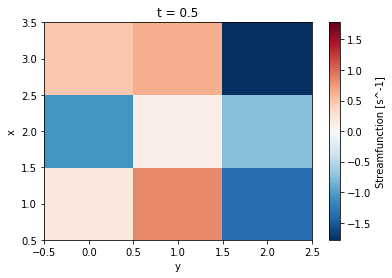

In [25]:
data.sel(t=0.5).plot()

## 6. Datasets  
Datasets are dict-like containers of dataarray objects.

In [28]:
ds = xr.Dataset({
    'foo':data,
    'bar':('x', [3,9,2.1]), 
    'baz': np.pi
})
ds

<xarray.Dataset>
Dimensions:  (t: 10, x: 3, y: 3)
Coordinates:
  * x        (x) int64 1 2 3
  * t        (t) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
Dimensions without coordinates: y
Data variables:
    foo      (x, y, t) float64 -0.02559 1.572 -0.06861 ... 0.04867 0.06314
    bar      (x) float64 3.0 9.0 2.1
    baz      float64 3.142

In [29]:
# To access dataArrays, use dictionary or dot indexing:
ds['foo']

<xarray.DataArray 'foo' (x: 3, y: 3, t: 10)>
array([[[-0.02559067,  1.57159342, -0.06860548, -0.67500958,
          0.25065785,  0.18730936,  0.48059469,  1.25409245,
          0.97660735,  0.0793909 ],
        [ 1.09113325, -0.91518388, -0.06275775,  1.29483649,
         -0.04468419,  0.85334306, -1.36487639, -0.12657999,
         -0.3837587 ,  0.13978202],
        [-4.07449006,  0.05996598, -1.35920054, -0.67689187,
          0.4809029 , -1.35448712, -1.31229682, -0.17702386,
          0.02088847,  0.5731095 ]],

       [[-0.35764798,  1.62425363, -0.56583567, -0.12959125,
         -0.50134577, -1.05717825,  0.19600788,  1.82258236,
         -1.91507015,  0.48541738],
        [-3.07865284, -1.97195829, -1.20415447,  0.72018198,
          1.33722756,  0.11896337, -0.16913824,  1.23589731,
          0.3194433 , -1.27049147],
        [ 0.87741829,  1.23206874, -0.4213578 ,  1.41741879,
         -0.90714142, -0.75940514, -0.29287116,  1.36902947,
         -1.04384811, -0.3174537 ]],

       [[-0.33122322, -0.8223462 , -2.12378674,  0.35618605,
          1.84667084,  0.47915425, -1.94307109, -0.44478408,
         -0.34242059, -1.02596207],
        [-0.76499412, -0.93628235, -0.08760794,  1.6028918 ,
         -0.72383782,  0.64855247,  1.14291379,  0.18813083,
          1.48113258,  0.23025316],
        [-0.33333112,  0.31601718,  0.60165656,  0.32272265,
         -0.78970592, -1.77837882,  0.18741257, -0.65600562,
          0.0486723 ,  0.06313569]]])
Coordinates:
  * x        (x) int64 1 2 3
  * t        (t) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
Dimensions without coordinates: y
Attributes:
    long_name:    Streamfunction
    units:        s^-1
    Description:  This isn't actually any significant data

## Saving datasets as NetCDFs

In [31]:
ds = xr.Dataset(
    {'Dataarray1':data},
    {'Dataarrays2':daaata}
)

NameError: name 'daaata' is not defined

In [32]:
ds.to_netcdf('tomfoolery.nc')

In [33]:
ds2 = xr.open_dataset('tomfoolery.nc')

In [34]:
ds2

<xarray.Dataset>
Dimensions:  (t: 10, x: 3, y: 3)
Coordinates:
  * x        (x) int64 1 2 3
  * t        (t) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
Dimensions without coordinates: y
Data variables:
    foo      (x, y, t) float64 ...
    bar      (x) float64 ...
    baz      float64 ...